Ian
TODO: exploratory hiv/aids, merge hiv/aids into Tiffany's merged df, clean covid, exploratory covid, merge covid into larger df
DONE:

Tiffany
TODO: probably something ¯\_(ツ)_/¯

Both
TODO: Cleaning/format the merged notebook for handin to make it professional

• Quality of cleaning (6 points, 2 points each)
    - Data cleaning and type conversion activity. Please share anything unusual you faced during this activity.
    - What did you do about missing values and why? Handling missing values properly is very important.
    - New feature/attribute creation and data summary statistics and interpretation.
• Visualization (8 points, 2 points each)
    - Data visualization activity (box plot, bar plot, violin plot, and pairplot to see relationships and distribution, etc.).
    - Describe anything you find in the data after each visualization.
    - What data visualization helped you understand about data distribution.
    - What you did about possible outlier as per data distribution visualization. (Did you confirm with your client whether it is actually an outlier or put a disclosure statement in your notebook if you decided to remove it?)

# Import packages

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data initializer

In [14]:
def init_data(csv):
    if "education" in csv:
        education = pd.read_csv(csv, skiprows=4)
        return education
        # education.head()
    if "GDP" in csv:
        gdp = pd.read_csv(csv, skiprows=4)
        return gdp
    if "malnutrition" in csv:
        malnutrition = pd.read_csv(csv, skiprows=4)
        return malnutrition
    if "poverty" in csv:
        poverty = pd.read_csv(csv, skiprows=4)
        return poverty
    if "swine" in csv:
        swine_flu = pd.read_csv(csv)
        return swine_flu
    if "hiv_aids" in csv:
        hiv_aids = pd.read_csv(csv)
        return hiv_aids
    if "covid" in csv:
        covid = pd.read_csv(csv)
        return covid

education

In [15]:
education = init_data("data/world_bank_data/education.csv")
education["Country"] = education["Country Name"]
education = education.drop(["Country Name"], axis=1).reindex()
education.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Country
0,ABW,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.570641,101.180557,NaN,NaN,NaN,NaN,NaN,NaN,Aruba
1,AFE,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa Eastern and Southern
2,AFG,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.495041,84.414948,85.625328,84.330589,NaN,Afghanistan
3,AFW,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa Western and Central
4,AGO,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angola


# Swine flu

In [16]:
swine = init_data("swine_flu_data.csv")
swine.head()

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths,Link
0,2009-04-24,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
1,2009-04-24,United States of America,7,0,https://www.who.int/csr/don/2009_04_24/en/
2,2009-04-26,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
3,2009-04-26,United States of America,20,0,https://www.who.int/csr/don/2009_04_24/en/
4,2009-04-27,Canada,6,0,https://www.who.int/csr/don/2009_04_24/en/


In [17]:
#sort
swine = swine.sort_values(by="Country")
swine.head()

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths,Link
2110,2009-07-01,Algeria,2,0,https://www.who.int/csr/don/2009_07_01a/en/
2355,2009-07-06,Algeria,5,0,https://www.who.int/csr/don/2009_07_06/en/
1994,2009-06-29,Algeria,2,0,https://www.who.int/csr/don/2009_06_29/en/
1882,2009-06-26,Algeria,2,0,https://www.who.int/csr/don/2009_06_26/en/
1774,2009-06-24,Algeria,2,0,https://www.who.int/csr/don/2009_06_24/en/


In [18]:
#drop the link column
swine = swine.drop(["Link"], axis=1)
swine.head()

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths
2110,2009-07-01,Algeria,2,0
2355,2009-07-06,Algeria,5,0
1994,2009-06-29,Algeria,2,0
1882,2009-06-26,Algeria,2,0
1774,2009-06-24,Algeria,2,0


In [19]:
swine["Percent of Deaths"] = swine["Cumulative no. of deaths"] / swine["Cumulative no. of cases"]
swine = swine.groupby(["Country"]).sum().reset_index()
swine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   148 non-null    object 
 1   Cumulative no. of cases   148 non-null    int64  
 2   Cumulative no. of deaths  148 non-null    int64  
 3   Percent of Deaths         148 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.8+ KB


In [20]:
#List of countries
cc = []
for i in swine["Country"]:
    if i not in cc:
        cc.append(i)
    else:
        continue
# cc


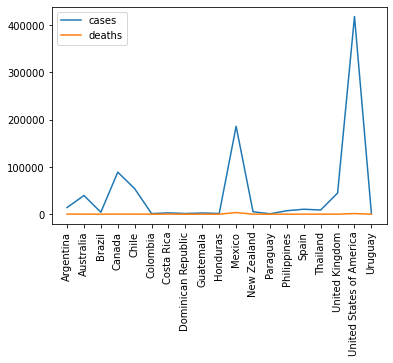

In [21]:
#plot countries
cases = []
deaths = []
country = []

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        cases.append(swine["Cumulative no. of cases"][i])
        deaths.append(swine["Cumulative no. of deaths"][i])

plt.xticks(rotation=90)
plt.plot(country, cases)
plt.plot(country, deaths)
plt.legend(["cases", "deaths"])
plt.show()

#plot countries
plt.plot(swine["Country"], swine["Percent of Deaths"])

In [22]:
swine_edu = swine.merge(education, on="Country", how='left')
swine_edu = swine_edu.fillna(0)


In [23]:
swine_edu.head(1)

,Country,Cumulative no. of cases,Cumulative no. of deaths,Percent of Deaths,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Algeria,19,0,0.0,DZA,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,0.0,0.0,0.0,...,97.636299,101.552879,106.031677,108.391579,105.546722,105.59005,105.636711,105.143959,101.364632,103.663528


KeyError: 'Education in 2009'

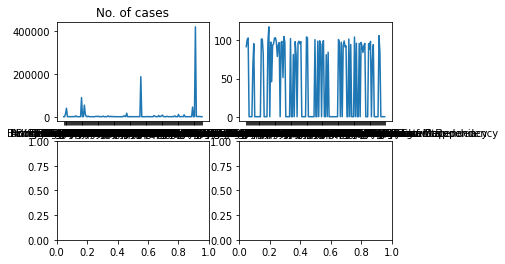

In [24]:
#plot Country, Number of cases, number of deaths
figure, axis = plt.subplots(2, 2)

#cases by country
axis[0, 0].plot(swine_edu["Country"], swine_edu["Cumulative no. of cases"])
axis[0, 0].set_title("No. of cases")

#2009 education
axis[0, 1].plot(swine_edu["Country"], swine_edu["2009"])
axis[0, 1].set_title(swine_edu["Education in 2009"])

#deaths by country
axis[1, 0].plot(swine_edu["Country"], swine_edu["Cumulative no. of deaths"])
axis[1, 0].set_title("No. of deaths")

#2010 education
axis[1, 1].plot(swine_edu["Country"], swine_edu["2010"])
axis[1, 1].set_title(swine_edu["Education in 2010"])

plt.show()

# HIV/AIDS

Read in the HIV/AIDS data containing death numbers per country

In [26]:
hiv_aids_df = init_data('data/hiv_aids_data/hiv_aids_death_data.csv')

Lets check out the first few rows to get a feel for how the data looks

In [27]:
hiv_aids_df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,EUR,Europe,Country,ALB,Albania,Year,2020,...,NaN,<,100.0,<,100.0,<100 [<100 – <100],NaN,NaN,EN,2021-10-11 00:00:00
1,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,EUR,Europe,Country,ARM,Armenia,Year,2020,...,NaN,<,100.0,<,100.0,<100 [<100 – <100],NaN,NaN,EN,2021-10-11 00:00:00
2,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,WPR,Western Pacific,Country,AUS,Australia,Year,2020,...,NaN,<,100.0,<,100.0,<100 [<100 – <100],NaN,NaN,EN,2021-10-11 00:00:00
3,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,AFR,Africa,Country,CPV,Cabo Verde,Year,2020,...,NaN,<,100.0,<,100.0,<100 [<100 – <100],NaN,NaN,EN,2021-10-11 00:00:00
4,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,AFR,Africa,Country,COM,Comoros,Year,2020,...,NaN,<,100.0,<,100.0,<100 [<100 – <100],NaN,NaN,EN,2021-10-11 00:00:00


Looking more closely at the data locally as a csv a lot of these columns have no values. Lets drop all the columns with no values

In [29]:
hiv_aids_df.dropna(axis=1, how='all', inplace=True)
hiv_aids_df

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueNumericPrefix,FactValueNumeric,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,Language,DateModified
0,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,EUR,Europe,Country,ALB,Albania,Year,2020,...,<,100.0,<,100.0,<,100.0,<100 [<100 – <100],NaN,EN,2021-10-11 00:00:00
1,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,EUR,Europe,Country,ARM,Armenia,Year,2020,...,<,100.0,<,100.0,<,100.0,<100 [<100 – <100],NaN,EN,2021-10-11 00:00:00
2,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,WPR,Western Pacific,Country,AUS,Australia,Year,2020,...,<,100.0,<,100.0,<,100.0,<100 [<100 – <100],NaN,EN,2021-10-11 00:00:00
3,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,AFR,Africa,Country,CPV,Cabo Verde,Year,2020,...,<,100.0,<,100.0,<,100.0,<100 [<100 – <100],NaN,EN,2021-10-11 00:00:00
4,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,AFR,Africa,Country,COM,Comoros,Year,2020,...,<,100.0,<,100.0,<,100.0,<100 [<100 – <100],NaN,EN,2021-10-11 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,EUR,Europe,Country,SWE,Sweden,Year,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,No data,827.0,EN,2021-10-11 00:00:00
3608,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,EUR,Europe,Country,TUR,Turkey,Year,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,No data,827.0,EN,2021-10-11 00:00:00
3609,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,EUR,Europe,Country,TKM,Turkmenistan,Year,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,No data,827.0,EN,2021-10-11 00:00:00
3610,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,No data,827.0,EN,2021-10-11 00:00:00


The IndicatorCode, ValueType, ParentsLocationCode,ParentLocation,LocationType,Period type,IsLastYear,Language will all be useless dropping them

In [30]:
hiv_aids_df.drop(
    columns=['IndicatorCode', 'ValueType', 'ParentLocationCode', 'ParentLocation', 'Location type', 'Period type',
             'IsLatestYear', 'Language', 'DateModified', 'FactValueTranslationID', 'FactValueNumericPrefix',
             'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericLowPrefix',
             'FactValueNumericHighPrefix',
             'FactValueNumericHigh', 'Value'], axis=1, inplace=True)

There is still missing data for the value which is the most important column for analysis, dropping all the rows where the value is missing.

In [31]:
hiv_aids_df.dropna(subset='FactValueNumeric', axis=0, inplace=True)
hiv_aids_df

,Indicator,SpatialDimValueCode,Location,Period,FactValueNumeric
0,Number of deaths due to HIV/AIDS,ALB,Albania,2020,100.0
1,Number of deaths due to HIV/AIDS,ARM,Armenia,2020,100.0
2,Number of deaths due to HIV/AIDS,AUS,Australia,2020,100.0
3,Number of deaths due to HIV/AIDS,CPV,Cabo Verde,2020,100.0
4,Number of deaths due to HIV/AIDS,COM,Comoros,2020,100.0
...,...,...,...,...,...
3565,Number of deaths due to HIV/AIDS,NAM,Namibia,2000,7600.0
3566,Number of deaths due to HIV/AIDS,MLI,Mali,2000,8600.0
3567,Number of deaths due to HIV/AIDS,TZA,United Republic of Tanzania,2000,86000.0
3568,Number of deaths due to HIV/AIDS,UGA,Uganda,2000,89000.0


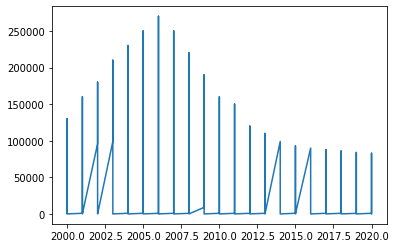

In [32]:
plt.plot(hiv_aids_df['Period'], hiv_aids_df['FactValueNumeric'])

After getting rid of all of those values there are only 131 countries

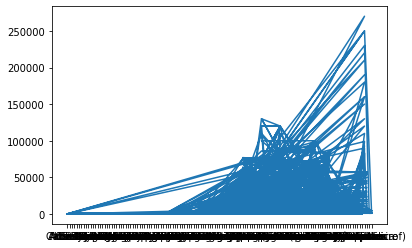

In [33]:
plt.plot(hiv_aids_df['Location'], hiv_aids_df['FactValueNumeric'])

In [34]:
unique_aiv_aids_countries = hiv_aids_df.Location.unique()
len(hiv_aids_df.unique_aiv_aids_countries)

AttributeError: 'DataFrame' object has no attribute 'unique_aiv_aids_countries'

Covid

In [35]:
covid_df = init_data('data/covid/full_grouped.csv')
unique_countries = np.unique(covid_df['Country/Region'])

Dataframe merger
we need to merge the following dataframes:
swine_edu
hiv_aids_df
covid_df
First lets look at all of the columns in these dataframes so we can know what to merge on

In [37]:

print(swine_edu.columns)
print(hiv_aids_df.columns)
print(covid_df.columns)

Index(['Country', 'Cumulative no. of cases', 'Cumulative no. of deaths',
       'Percent of Deaths', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')
Index(['Indicator', 'SpatialDimValueCode', 'Location', 'Period',
       'FactValueNumeric'],
      dtype='object')
Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')


swine_edu: Country
hiv_aids_df: Location
covid_df: Country/Region
all three dataframes use different time keeping methods.
swine_edu uses a column for each year while hiv_aids had a year column (period) and the covid_df has daily data and not yearly data which may cause abnormalities.

viewing the swineflu edu df and the giv df and their data

In [44]:
melted_swine_edu = pd.melt(swine_edu, id_vars=['Country', 'Cumulative no. of cases', 'Cumulative no. of deaths',
                                               'Percent of Deaths', 'Country Code', 'Indicator Name', 'Indicator Code'],
                           value_vars=['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
                                       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
                                       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
                                       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
                                       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
                                       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
                                       '2014', '2015', '2016', '2017', '2018', '2019', '2020'])

melted_swine_edu

,Country,Cumulative no. of cases,Cumulative no. of deaths,Percent of Deaths,Country Code,Indicator Name,Indicator Code,variable,value
0,Algeria,19,0,0.000000,DZA,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,1960,0.0
1,Antigua and Barbuda,12,0,0.000000,ATG,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,1960,0.0
2,Argentina,14045,175,0.105888,ARG,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,1960,0.0
3,Australia,39519,39,0.009328,AUS,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,1960,0.0
4,Austria,173,0,0.000000,AUT,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,1960,0.0
...,...,...,...,...,...,...,...,...,...
9023,Venezuela,1327,0,0.000000,0,0,0,2020,0.0
9024,Viet Nam,822,0,0.000000,0,0,0,2020,0.0
9025,Virgin Islands,1,0,0.000000,0,0,0,2020,0.0
9026,West Bank and Gaza Strip,146,0,0.000000,0,0,0,2020,0.0


In [ ]:
hiv_aids_df

getting common naming and normalizing (lowercasing and replacing spaces with underscores)

In [54]:
melted_swine_edu.rename(columns={"Country": "country",
                                 "Cumulative no. of cases": "cumulative_num_of_cases",
                                 "Cumulative no. of deaths": "cumulative_num_of_deaths",
                                 "Percent of Deaths": "percent_of_deaths",
                                 "Country Code": "country_code",
                                 "Indicator Name": "swine_indicator",
                                 "Indicator Code": "swine_indicator_code",
                                 "variable": "year"}, inplace=True)

hiv_aids_df.rename(columns={"Indicator": "hiv_aids_indicator",
                            "SpatialDimValueCode":"country_code",
                            "Location": "country",
                            "Period": "year",
                            "FactValueNumeric": "hiv_deaths"}, inplace=True)

viewing all values that are unique between the two data sets, i.e. the value is in one dataset but not the other. These will either need to be renamed or dropped

In [59]:
melted_swine_edu_hiv_aids_df = melted_swine_edu.merge(hiv_aids_df, on=['country'],indicator=True)
melted_swine_edu_hiv_aids_df[melted_swine_edu_hiv_aids_df['_merge'] == 'both']

,country,cumulative_num_of_cases,cumulative_num_of_deaths,percent_of_deaths,country code,swine_indicator,swine_indicator_code,year_x,value,hiv_aids_indicator,country_code,year_y,hiv_deaths,_merge
0,Algeria,19,0,0.0,DZA,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,1960,0.0,Number of deaths due to HIV/AIDS,DZA,2020,200.0,both
1,Algeria,19,0,0.0,DZA,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,1960,0.0,Number of deaths due to HIV/AIDS,DZA,2019,200.0,both
2,Algeria,19,0,0.0,DZA,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,1960,0.0,Number of deaths due to HIV/AIDS,DZA,2018,200.0,both
3,Algeria,19,0,0.0,DZA,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,1960,0.0,Number of deaths due to HIV/AIDS,DZA,2017,200.0,both
4,Algeria,19,0,0.0,DZA,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,1960,0.0,Number of deaths due to HIV/AIDS,DZA,2016,200.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83931,Yemen,50,0,0.0,0,0,0,2020,0.0,Number of deaths due to HIV/AIDS,YEM,2004,200.0,both
83932,Yemen,50,0,0.0,0,0,0,2020,0.0,Number of deaths due to HIV/AIDS,YEM,2003,200.0,both
83933,Yemen,50,0,0.0,0,0,0,2020,0.0,Number of deaths due to HIV/AIDS,YEM,2002,200.0,both
83934,Yemen,50,0,0.0,0,0,0,2020,0.0,Number of deaths due to HIV/AIDS,YEM,2001,200.0,both
